In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)

#Scale to (0, 1)
images = (mnist['data'].astype(np.float32)).to_numpy() / 255.0
labels = mnist['target'].astype(np.int64)

C:\Users\Mc_go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
import sys
import os

# Useful only to use the local version of mmd_critic located in
# ../mmd_critic/
sys.path.append(os.path.abspath('..'))

In [3]:
from mmd_critic import MMDCritic
from mmd_critic.kernels import RBFKernel

critic = MMDCritic(images[:15000], RBFKernel(2.5), RBFKernel(0.025), labels)

In [7]:
protos, proto_labels = critic.select_prototypes(40)

In [8]:
import matplotlib.pyplot as plt

def plot_mnist(images, labels, num_images=10):
    grid_size = int(np.sqrt(num_images))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image = images[i].reshape(28, 28)
            ax.imshow(image, cmap='gray')
            
            ax.set_title(f"Label: {labels[i]}")
            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()

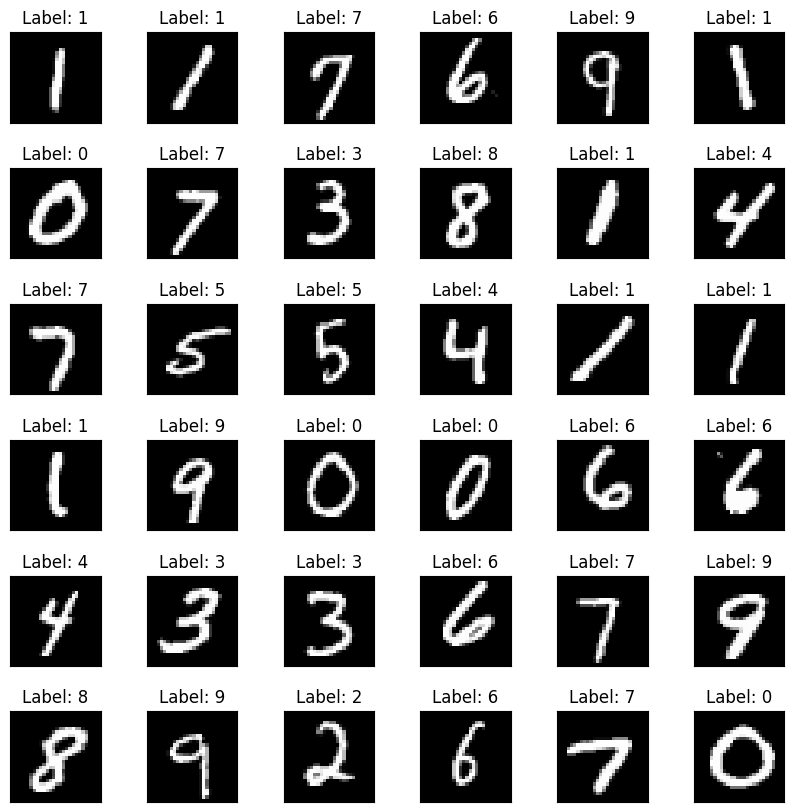

In [12]:
plot_mnist(protos, proto_labels, len(protos))

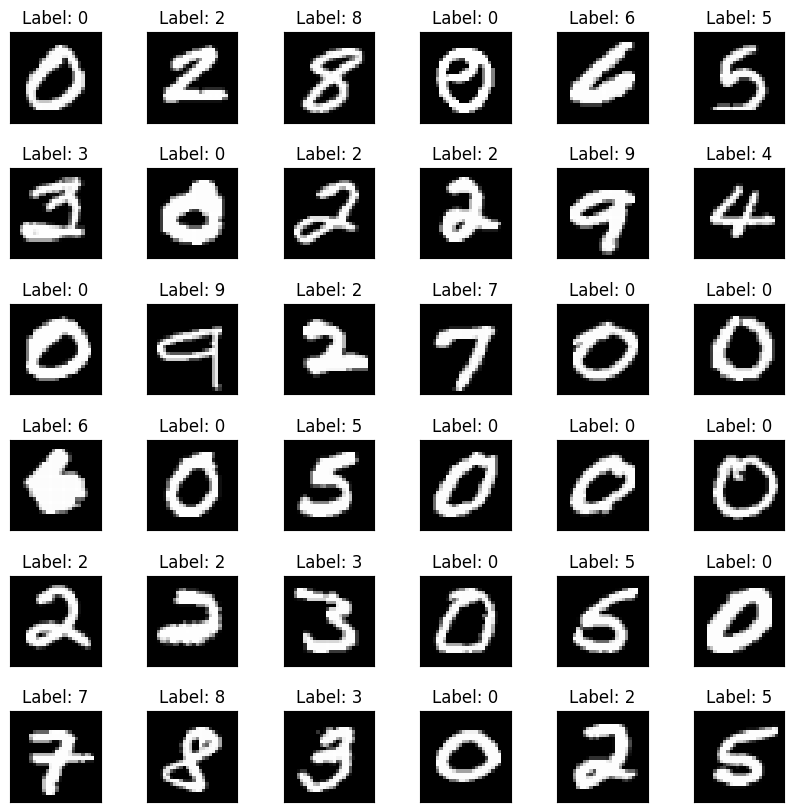

In [13]:
criticisms, criticism_labels = critic.select_criticisms(40, protos)
plot_mnist(criticisms, criticism_labels, len(criticisms))